# A-Data

In [693]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

excel_name = '附件1 监测点A空气质量预报基础数据.xlsx'#附件1 监测点A空气质量预报基础数据.xlsx
na_values = '—'

def cp(value, value_name):
    print('==============%s=============='%value_name)
    print(value)    
    print('==============%s=============='%value_name)

data3 = pd.read_excel(excel_name, sheet_name=2,na_values=na_values)
data3.head(3)

,监测日期,地点,SO2监测浓度(μg/m³),NO2监测浓度(μg/m³),PM10监测浓度(μg/m³),PM2.5监测浓度(μg/m³),O3最大八小时滑动平均监测浓度(μg/m³),CO监测浓度(mg/m³)
0,2019-04-16,监测点A,5.0,56.0,36.0,31.0,103.0,0.8
1,2019-04-17,监测点A,9.0,63.0,67.0,53.0,206.0,1.1
2,2019-04-18,监测点A,6.0,37.0,31.0,25.0,83.0,0.6


In [694]:
start_time = '2019-04-16 00:00:00'
end_time = '2021-07-12 00:00:00'
time_list = pd.date_range(start_time, end_time, freq='D')
data3 = data3.iloc[:-3,:]
print('应有天数',len(time_list))
print('实际天数', len(data3))
data3

应有天数 819
实际天数 819


,监测日期,地点,SO2监测浓度(μg/m³),NO2监测浓度(μg/m³),PM10监测浓度(μg/m³),PM2.5监测浓度(μg/m³),O3最大八小时滑动平均监测浓度(μg/m³),CO监测浓度(mg/m³)
0,2019-04-16,监测点A,5.0,56.0,36.0,31.0,103.0,0.8
1,2019-04-17,监测点A,9.0,63.0,67.0,53.0,206.0,1.1
2,2019-04-18,监测点A,6.0,37.0,31.0,25.0,83.0,0.6
3,2019-04-19,监测点A,5.0,50.0,23.0,15.0,71.0,0.6
4,2019-04-20,监测点A,6.0,68.0,33.0,26.0,32.0,0.7
...,...,...,...,...,...,...,...,...
814,2021-07-08,监测点A,5.0,15.0,18.0,3.0,64.0,0.4
815,2021-07-09,监测点A,7.0,17.0,28.0,12.0,146.0,0.4
816,2021-07-10,监测点A,6.0,13.0,20.0,5.0,81.0,0.4
817,2021-07-11,监测点A,6.0,11.0,20.0,3.0,63.0,0.3


# 预处理

In [695]:
data3.isnull().sum()

监测日期                       0
地点                         0
SO2监测浓度(μg/m³)             4
NO2监测浓度(μg/m³)             6
PM10监测浓度(μg/m³)           11
PM2.5监测浓度(μg/m³)           5
O3最大八小时滑动平均监测浓度(μg/m³)     7
CO监测浓度(mg/m³)              6
dtype: int64

In [696]:
data_temp = data3.iloc[:,2:].interpolate()
data_temp.isnull().sum()

SO2监测浓度(μg/m³)            0
NO2监测浓度(μg/m³)            0
PM10监测浓度(μg/m³)           0
PM2.5监测浓度(μg/m³)          0
O3最大八小时滑动平均监测浓度(μg/m³)    0
CO监测浓度(mg/m³)             0
dtype: int64

In [697]:
data_temp.describe()

,SO2监测浓度(μg/m³),NO2监测浓度(μg/m³),PM10监测浓度(μg/m³),PM2.5监测浓度(μg/m³),O3最大八小时滑动平均监测浓度(μg/m³),CO监测浓度(mg/m³)
count,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000
mean,7.008547,32.875458,44.073871,24.219170,98.542125,0.715568
std,3.065990,18.737483,23.198945,22.217843,51.869257,0.206167
min,1.000000,4.000000,5.000000,2.000000,2.000000,0.300000
25%,5.000000,20.000000,27.000000,11.000000,61.000000,0.600000
50%,6.000000,29.000000,38.000000,21.000000,87.000000,0.700000
75%,9.000000,41.500000,56.000000,32.500000,128.000000,0.800000
max,20.000000,132.000000,143.000000,465.000000,296.000000,1.500000


In [698]:
data_A = data_temp.copy()

# A1-data

In [699]:
excel_name = '附件3 监测点A1、A2、A3空气质量预报基础数据.xlsx'#附件1 监测点A空气质量预报基础数据.xlsx
data3 = pd.read_excel(excel_name, sheet_name=-3,na_values=na_values)
data3.head(3)

,监测日期,地点,SO2监测浓度(μg/m³),NO2监测浓度(μg/m³),PM10监测浓度(μg/m³),PM2.5监测浓度(μg/m³),O3最大八小时滑动平均监测浓度(μg/m³),CO监测浓度(mg/m³)
0,2019-04-16,监测点A1,9.0,51.0,43.0,35.0,115.0,0.9
1,2019-04-17,监测点A1,14.0,69.0,100.0,61.0,216.0,1.2
2,2019-04-18,监测点A1,14.0,41.0,44.0,24.0,65.0,0.8


In [700]:
start_time = '2019-04-16 00:00:00'
end_time = '2021-07-12 00:00:00'
time_list = pd.date_range(start_time, end_time, freq='D')
data3 = data3.iloc[:-3,:]
print('应有天数',len(time_list))
print('实际天数', len(data3))
data3

应有天数 819
实际天数 819


,监测日期,地点,SO2监测浓度(μg/m³),NO2监测浓度(μg/m³),PM10监测浓度(μg/m³),PM2.5监测浓度(μg/m³),O3最大八小时滑动平均监测浓度(μg/m³),CO监测浓度(mg/m³)
0,2019-04-16,监测点A1,9.0,51.0,43.0,35.0,115.0,0.9
1,2019-04-17,监测点A1,14.0,69.0,100.0,61.0,216.0,1.2
2,2019-04-18,监测点A1,14.0,41.0,44.0,24.0,65.0,0.8
3,2019-04-19,监测点A1,13.0,50.0,36.0,16.0,66.0,0.8
4,2019-04-20,监测点A1,14.0,66.0,48.0,30.0,40.0,0.9
...,...,...,...,...,...,...,...,...
814,2021-07-08,监测点A1,6.0,13.0,16.0,5.0,72.0,0.4
815,2021-07-09,监测点A1,7.0,17.0,29.0,12.0,133.0,0.4
816,2021-07-10,监测点A1,7.0,17.0,30.0,13.0,146.0,0.4
817,2021-07-11,监测点A1,6.0,12.0,26.0,8.0,119.0,0.3


In [701]:
data3.isnull().sum()

监测日期                      0
地点                        0
SO2监测浓度(μg/m³)            1
NO2监测浓度(μg/m³)            1
PM10监测浓度(μg/m³)           1
PM2.5监测浓度(μg/m³)          3
O3最大八小时滑动平均监测浓度(μg/m³)    1
CO监测浓度(mg/m³)             1
dtype: int64

In [702]:
data_temp = data3.iloc[:,2:].interpolate()
data_temp.isnull().sum()

SO2监测浓度(μg/m³)            0
NO2监测浓度(μg/m³)            0
PM10监测浓度(μg/m³)           0
PM2.5监测浓度(μg/m³)          0
O3最大八小时滑动平均监测浓度(μg/m³)    0
CO监测浓度(mg/m³)             0
dtype: int64

In [703]:
data_temp.describe()

,SO2监测浓度(μg/m³),NO2监测浓度(μg/m³),PM10监测浓度(μg/m³),PM2.5监测浓度(μg/m³),O3最大八小时滑动平均监测浓度(μg/m³),CO监测浓度(mg/m³)
count,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000
mean,11.241148,36.598901,53.839438,24.346764,100.330891,0.638645
std,3.132491,22.857737,32.304672,16.505742,51.321096,0.192047
min,4.000000,8.000000,6.000000,2.000000,6.000000,0.200000
25%,9.000000,21.000000,30.000000,12.000000,63.000000,0.500000
50%,11.000000,31.000000,45.000000,20.000000,88.000000,0.600000
75%,13.000000,46.000000,70.000000,32.000000,130.000000,0.700000
max,28.000000,168.000000,213.000000,117.000000,336.000000,1.600000


In [704]:
data_A1 = data_temp.copy()

In [705]:
data3 = pd.read_excel(excel_name, sheet_name=-2,na_values=na_values)
data3.head(3)

,监测日期,地点,SO2监测浓度(μg/m³),NO2监测浓度(μg/m³),PM10监测浓度(μg/m³),PM2.5监测浓度(μg/m³),O3最大八小时滑动平均监测浓度(μg/m³),CO监测浓度(mg/m³)
0,2019-04-16,监测点A2,2.0,56.0,44.0,30.0,83.0,1.1
1,2019-04-17,监测点A2,7.0,62.0,87.0,56.0,190.0,1.3
2,2019-04-18,监测点A2,3.0,41.0,42.0,25.0,58.0,0.9


In [706]:
start_time = '2019-04-16 00:00:00'
end_time = '2021-07-12 00:00:00'
time_list = pd.date_range(start_time, end_time, freq='D')
data3 = data3.iloc[:-3,:]
print('应有天数',len(time_list))
print('实际天数', len(data3))
data3

应有天数 819
实际天数 819


,监测日期,地点,SO2监测浓度(μg/m³),NO2监测浓度(μg/m³),PM10监测浓度(μg/m³),PM2.5监测浓度(μg/m³),O3最大八小时滑动平均监测浓度(μg/m³),CO监测浓度(mg/m³)
0,2019-04-16,监测点A2,2.0,56.0,44.0,30.0,83.0,1.1
1,2019-04-17,监测点A2,7.0,62.0,87.0,56.0,190.0,1.3
2,2019-04-18,监测点A2,3.0,41.0,42.0,25.0,58.0,0.9
3,2019-04-19,监测点A2,2.0,42.0,25.0,16.0,62.0,0.7
4,2019-04-20,监测点A2,3.0,53.0,41.0,29.0,25.0,1.0
...,...,...,...,...,...,...,...,...
814,2021-07-08,监测点A2,4.0,18.0,17.0,4.0,86.0,0.4
815,2021-07-09,监测点A2,5.0,18.0,29.0,12.0,162.0,0.5
816,2021-07-10,监测点A2,5.0,16.0,26.0,9.0,120.0,0.4
817,2021-07-11,监测点A2,4.0,13.0,22.0,5.0,97.0,0.4


In [707]:
data3.isnull().sum()

监测日期                      0
地点                        0
SO2监测浓度(μg/m³)            6
NO2监测浓度(μg/m³)            9
PM10监测浓度(μg/m³)           6
PM2.5监测浓度(μg/m³)          9
O3最大八小时滑动平均监测浓度(μg/m³)    9
CO监测浓度(mg/m³)             8
dtype: int64

In [708]:
data_temp = data3.iloc[:,2:].interpolate()
data_temp.isnull().sum()

SO2监测浓度(μg/m³)            0
NO2监测浓度(μg/m³)            0
PM10监测浓度(μg/m³)           0
PM2.5监测浓度(μg/m³)          0
O3最大八小时滑动平均监测浓度(μg/m³)    0
CO监测浓度(mg/m³)             0
dtype: int64

In [709]:
data_temp.describe()

,SO2监测浓度(μg/m³),NO2监测浓度(μg/m³),PM10监测浓度(μg/m³),PM2.5监测浓度(μg/m³),O3最大八小时滑动平均监测浓度(μg/m³),CO监测浓度(mg/m³)
count,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000
mean,7.004884,38.566545,53.266178,24.513431,102.733822,0.742430
std,2.814992,22.228151,30.845443,17.015417,51.681617,0.240956
min,2.000000,9.000000,7.000000,2.000000,5.000000,0.300000
25%,5.000000,23.000000,30.000000,12.000000,66.000000,0.600000
50%,6.000000,34.000000,45.000000,21.000000,93.000000,0.700000
75%,9.000000,48.000000,70.000000,33.000000,132.000000,0.900000
max,21.000000,182.000000,229.000000,135.000000,283.000000,1.800000


In [710]:
data_A2 = data_temp.copy()

In [711]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

excel_name = '附件3 监测点A1、A2、A3空气质量预报基础数据.xlsx'#附件1 监测点A空气质量预报基础数据.xlsx
na_values = '—'

def cp(value, value_name):
    print('==============%s=============='%value_name)
    print(value)    
    print('==============%s=============='%value_name)

data3 = pd.read_excel(excel_name, sheet_name=-1,na_values=na_values)
data3.head(3)

,监测日期,地点,SO2监测浓度(μg/m³),NO2监测浓度(μg/m³),PM10监测浓度(μg/m³),PM2.5监测浓度(μg/m³),O3最大八小时滑动平均监测浓度(μg/m³),CO监测浓度(mg/m³)
0,2019-04-16,监测点A3,4.0,49.0,51.0,32.0,95.0,1.2
1,2019-04-17,监测点A3,8.0,64.0,96.0,58.0,195.0,1.4
2,2019-04-18,监测点A3,9.0,31.0,41.0,23.0,69.0,0.8


In [712]:
start_time = '2019-04-16 00:00:00'
end_time = '2021-07-12 00:00:00'
time_list = pd.date_range(start_time, end_time, freq='D')
data3 = data3.iloc[:-3,:]
print('应有天数',len(time_list))
print('实际天数', len(data3))
data3

应有天数 819
实际天数 805


,监测日期,地点,SO2监测浓度(μg/m³),NO2监测浓度(μg/m³),PM10监测浓度(μg/m³),PM2.5监测浓度(μg/m³),O3最大八小时滑动平均监测浓度(μg/m³),CO监测浓度(mg/m³)
0,2019-04-16,监测点A3,4.0,49.0,51.0,32.0,95.0,1.2
1,2019-04-17,监测点A3,8.0,64.0,96.0,58.0,195.0,1.4
2,2019-04-18,监测点A3,9.0,31.0,41.0,23.0,69.0,0.8
3,2019-04-19,监测点A3,9.0,39.0,30.0,16.0,66.0,0.7
4,2019-04-20,监测点A3,6.0,58.0,43.0,26.0,34.0,0.9
...,...,...,...,...,...,...,...,...
800,2021-07-08,监测点A3,3.0,10.0,10.0,4.0,72.0,0.3
801,2021-07-09,监测点A3,5.0,13.0,19.0,11.0,143.0,0.3
802,2021-07-10,监测点A3,4.0,10.0,12.0,5.0,85.0,0.3
803,2021-07-11,监测点A3,4.0,6.0,12.0,NaN,78.0,0.3


In [713]:
temp_df = data3.copy()
lack_list = list(set(time_list)-set(data3['监测日期']))
lack_df = pd.DataFrame(lack_list,columns=['监测日期'])
temp_df = pd.concat([temp_df,lack_df])
temp_df.sort_values("监测日期",inplace=True)
temp_df.index = list(range(len(temp_df)))
temp_df.shape

(819, 8)

In [714]:
data3 = temp_df
data3.isnull().sum()

监测日期                       0
地点                        14
SO2监测浓度(μg/m³)            17
NO2监测浓度(μg/m³)            17
PM10监测浓度(μg/m³)           20
PM2.5监测浓度(μg/m³)          41
O3最大八小时滑动平均监测浓度(μg/m³)    26
CO监测浓度(mg/m³)             18
dtype: int64

In [715]:
data_temp = data3.iloc[:,2:].interpolate()
data_temp.isnull().sum()

SO2监测浓度(μg/m³)            0
NO2监测浓度(μg/m³)            0
PM10监测浓度(μg/m³)           0
PM2.5监测浓度(μg/m³)          0
O3最大八小时滑动平均监测浓度(μg/m³)    0
CO监测浓度(mg/m³)             0
dtype: int64

In [716]:
data_temp.describe()

,SO2监测浓度(μg/m³),NO2监测浓度(μg/m³),PM10监测浓度(μg/m³),PM2.5监测浓度(μg/m³),O3最大八小时滑动平均监测浓度(μg/m³),CO监测浓度(mg/m³)
count,819.000000,819.000000,819.000000,819.000000,819.000000,819.000000
mean,6.772283,31.718559,50.344933,23.836996,99.159341,0.715018
std,2.473065,19.955887,31.032813,16.505207,51.984303,0.199965
min,2.000000,5.000000,7.000000,3.000000,4.000000,0.200000
25%,5.000000,18.000000,28.000000,11.000000,62.500000,0.600000
50%,6.000000,27.000000,41.000000,20.000000,86.000000,0.700000
75%,8.000000,39.000000,66.000000,31.000000,125.500000,0.800000
max,22.000000,152.000000,173.000000,154.000000,288.000000,1.600000


In [717]:
data_A3 = data_temp.copy()

# 协同性分析,分别是（SO2...CO）

,A,A1,A2,A3
count,4.000000,4.000000,4.000000,4.000000
mean,0.727161,0.673157,0.746835,0.764617
std,0.207668,0.223902,0.179439,0.163842
min,0.495507,0.495507,0.577567,0.619556
25%,0.642875,0.557052,0.663390,0.693221
50%,0.706568,0.598561,0.704887,0.719457
75%,0.790853,0.714667,0.788332,0.790853
max,1.000000,1.000000,1.000000,1.000000


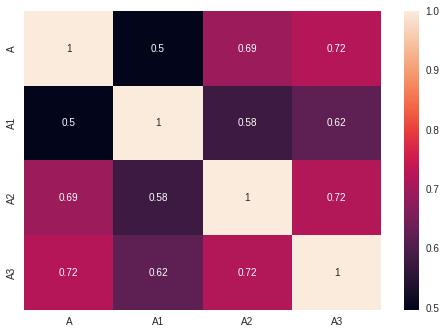

In [718]:
import seaborn as sns
target_polution = 0
temp = pd.DataFrame(np.array([data_A.iloc[:,target_polution].values,
data_A1.iloc[:,target_polution].values,
data_A2.iloc[:,target_polution].values,
data_A3.iloc[:,target_polution].values,])).T
corr = temp.corr()
corr.columns = ['A','A1','A2','A3']
corr.index = corr.columns
sns.heatmap(corr,annot=True)
corr.describe()

,A,A1,A2,A3
count,4.000000,4.000000,4.000000,4.000000
mean,0.964981,0.969330,0.969509,0.964863
std,0.023488,0.023313,0.023126,0.023579
min,0.951395,0.950982,0.951518,0.950982
25%,0.951531,0.951292,0.951562,0.951384
50%,0.954264,0.963169,0.963259,0.954235
75%,0.967713,0.981207,0.981207,0.967713
max,1.000000,1.000000,1.000000,1.000000


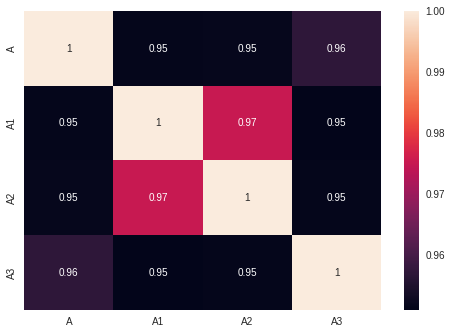

In [719]:
import seaborn as sns
target_polution = 1
temp = pd.DataFrame(np.array([data_A.iloc[:,target_polution].values,
data_A1.iloc[:,target_polution].values,
data_A2.iloc[:,target_polution].values,
data_A3.iloc[:,target_polution].values,])).T
corr = temp.corr()
corr.columns = ['A','A1','A2','A3']
corr.index = corr.columns
sns.heatmap(corr,annot=True)
corr.describe()

,A,A1,A2,A3
count,4.000000,4.000000,4.000000,4.000000
mean,0.978316,0.981275,0.981841,0.979034
std,0.014653,0.014699,0.014136,0.014112
min,0.969381,0.969381,0.969411,0.969714
25%,0.969404,0.969631,0.971314,0.971390
50%,0.971942,0.977860,0.978977,0.973211
75%,0.980855,0.989505,0.989505,0.980855
max,1.000000,1.000000,1.000000,1.000000


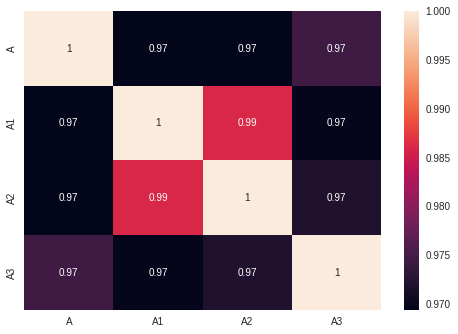

In [720]:
import seaborn as sns
target_polution = 2
temp = pd.DataFrame(np.array([data_A.iloc[:,target_polution].values,
data_A1.iloc[:,target_polution].values,
data_A2.iloc[:,target_polution].values,
data_A3.iloc[:,target_polution].values,])).T
corr = temp.corr()
corr.columns = ['A','A1','A2','A3']
corr.index = corr.columns
sns.heatmap(corr,annot=True)
corr.describe()

,A,A1,A2,A3
count,4.000000,4.000000,4.000000,4.000000
mean,0.757494,0.894057,0.895293,0.871805
std,0.162201,0.144889,0.142869,0.147946
min,0.658287,0.683723,0.687966,0.658287
25%,0.677364,0.856518,0.858105,0.850159
50%,0.685844,0.946253,0.946604,0.914467
75%,0.765974,0.983793,0.983793,0.936113
max,1.000000,1.000000,1.000000,1.000000


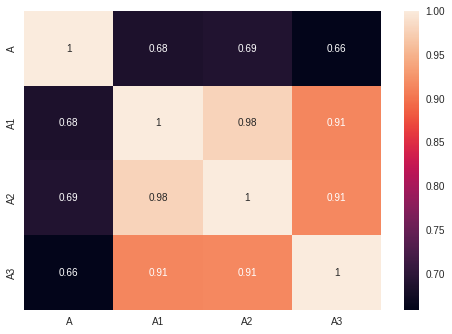

In [721]:
import seaborn as sns
target_polution = 3
temp = pd.DataFrame(np.array([data_A.iloc[:,target_polution].values,
data_A1.iloc[:,target_polution].values,
data_A2.iloc[:,target_polution].values,
data_A3.iloc[:,target_polution].values,])).T
corr = temp.corr()
corr.columns = ['A','A1','A2','A3']
corr.index = corr.columns
sns.heatmap(corr,annot=True)
corr.describe()

,A,A1,A2,A3
count,4.000000,4.000000,4.000000,4.000000
mean,0.970538,0.969624,0.972186,0.970550
std,0.020540,0.020817,0.018938,0.019736
min,0.952734,0.952734,0.957884,0.957884
25%,0.959821,0.959784,0.962192,0.961072
50%,0.964708,0.962881,0.965430,0.962159
75%,0.975424,0.972721,0.975424,0.971637
max,1.000000,1.000000,1.000000,1.000000


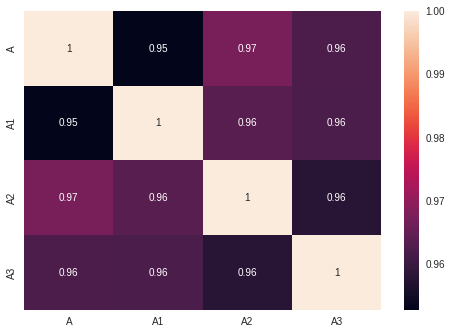

In [722]:
import seaborn as sns
target_polution = 4
temp = pd.DataFrame(np.array([data_A.iloc[:,target_polution].values,
data_A1.iloc[:,target_polution].values,
data_A2.iloc[:,target_polution].values,
data_A3.iloc[:,target_polution].values,])).T
corr = temp.corr()
corr.columns = ['A','A1','A2','A3']
corr.index = corr.columns
sns.heatmap(corr,annot=True)
corr.describe()

,A,A1,A2,A3
count,4.000000,4.000000,4.000000,4.000000
mean,0.831233,0.801036,0.835055,0.852539
std,0.119402,0.137244,0.123417,0.100180
min,0.718863,0.701720,0.701720,0.783562
25%,0.777527,0.714577,0.782170,0.793702
50%,0.803034,0.751213,0.819249,0.813297
75%,0.856740,0.837672,0.872134,0.872134
max,1.000000,1.000000,1.000000,1.000000


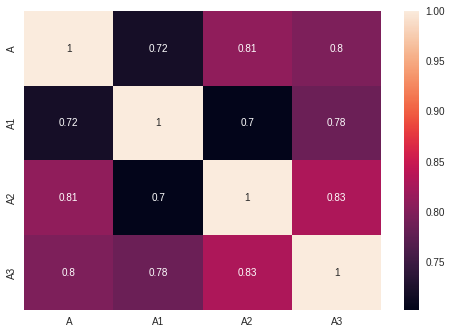

In [723]:
import seaborn as sns
target_polution = 5
temp = pd.DataFrame(np.array([data_A.iloc[:,target_polution].values,
data_A1.iloc[:,target_polution].values,
data_A2.iloc[:,target_polution].values,
data_A3.iloc[:,target_polution].values,])).T
corr = temp.corr()
corr.columns = ['A','A1','A2','A3']
corr.index = corr.columns
sns.heatmap(corr,annot=True)
corr.describe()

## 距离矩阵

<AxesSubplot:>

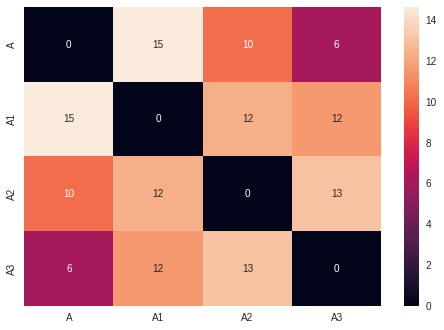

In [724]:
import numpy as np
def compute_distance():
    a=[[0,0],[-14.4846, -1.9699],[-6.6716, 7.5953],[-3.3543, -5.0138]]
    d=np.zeros((4,4))
    for i in range(4):
        for j in range(4):
            tmp=(a[i][0] - a[j][0]) ** 2 + (a[i][1] -a[j][1]) ** 2
            d[i,j]=np.sqrt(tmp)
    return d

dis = pd.DataFrame(compute_distance())
dis.columns = ['A','A1','A2','A3']
dis.index = ['A','A1','A2','A3']
sns.heatmap(dis,annot=True)

In [725]:
data_all = pd.concat([data_A,data_A1,data_A2,data_A3],axis=1)
data_all

,SO2监测浓度(μg/m³),NO2监测浓度(μg/m³),PM10监测浓度(μg/m³),PM2.5监测浓度(μg/m³),O3最大八小时滑动平均监测浓度(μg/m³),CO监测浓度(mg/m³),SO2监测浓度(μg/m³),NO2监测浓度(μg/m³),PM10监测浓度(μg/m³),PM2.5监测浓度(μg/m³),...,PM10监测浓度(μg/m³),PM2.5监测浓度(μg/m³),O3最大八小时滑动平均监测浓度(μg/m³),CO监测浓度(mg/m³),SO2监测浓度(μg/m³),NO2监测浓度(μg/m³),PM10监测浓度(μg/m³),PM2.5监测浓度(μg/m³),O3最大八小时滑动平均监测浓度(μg/m³),CO监测浓度(mg/m³)
0,5.0,56.0,36.0,31.0,103.0,0.8,9.0,51.0,43.0,35.0,...,44.0,30.0,83.0,1.1,4.0,49.0,51.0,32.0,95.0,1.2
1,9.0,63.0,67.0,53.0,206.0,1.1,14.0,69.0,100.0,61.0,...,87.0,56.0,190.0,1.3,8.0,64.0,96.0,58.0,195.0,1.4
2,6.0,37.0,31.0,25.0,83.0,0.6,14.0,41.0,44.0,24.0,...,42.0,25.0,58.0,0.9,9.0,31.0,41.0,23.0,69.0,0.8
3,5.0,50.0,23.0,15.0,71.0,0.6,13.0,50.0,36.0,16.0,...,25.0,16.0,62.0,0.7,9.0,39.0,30.0,16.0,66.0,0.7
4,6.0,68.0,33.0,26.0,32.0,0.7,14.0,66.0,48.0,30.0,...,41.0,29.0,25.0,1.0,6.0,58.0,43.0,26.0,34.0,0.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
814,5.0,15.0,18.0,3.0,64.0,0.4,6.0,13.0,16.0,5.0,...,17.0,4.0,86.0,0.4,3.0,10.0,10.0,4.0,72.0,0.3
815,7.0,17.0,28.0,12.0,146.0,0.4,7.0,17.0,29.0,12.0,...,29.0,12.0,162.0,0.5,5.0,13.0,19.0,11.0,143.0,0.3
816,6.0,13.0,20.0,5.0,81.0,0.4,7.0,17.0,30.0,13.0,...,26.0,9.0,120.0,0.4,4.0,10.0,12.0,5.0,85.0,0.3
817,6.0,11.0,20.0,3.0,63.0,0.3,6.0,12.0,26.0,8.0,...,22.0,5.0,97.0,0.4,4.0,6.0,12.0,5.5,78.0,0.3


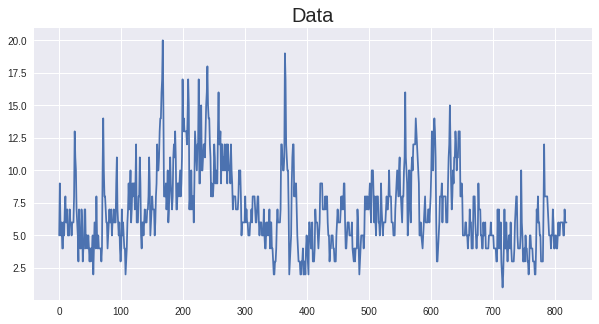

In [726]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

predict_dim = 3 
time_step = 10

target = data_all.iloc[:,0].values
#plot
plt.figure(figsize=(10,5))
plt.plot(target)
plt.title("Data",fontsize='20') #添加标题
plt.show()
print('\n')


# 归一化

In [727]:
#minmaxscaler
mm_x= MinMaxScaler()
mm_all= MinMaxScaler()
mm_x.fit_transform(data_A)
data = mm_all.fit_transform(data_all)
data[:2]

array([[0.21052632, 0.40625   , 0.22463768, 0.06263499, 0.34353741,
        0.41666667, 0.20833333, 0.26875   , 0.17874396, 0.28695652,
        0.33030303, 0.5       , 0.        , 0.2716763 , 0.16666667,
        0.21052632, 0.28057554, 0.53333333, 0.1       , 0.29931973,
        0.26506024, 0.19205298, 0.32042254, 0.71428571],
       [0.42105263, 0.4609375 , 0.44927536, 0.11015119, 0.69387755,
        0.66666667, 0.41666667, 0.38125   , 0.45410628, 0.51304348,
        0.63636364, 0.71428571, 0.26315789, 0.30635838, 0.36036036,
        0.40601504, 0.66546763, 0.66666667, 0.3       , 0.40136054,
        0.53614458, 0.36423841, 0.67253521, 0.85714286]])

In [728]:
import os
import tensorflow as tf
os.environ["CUDA_VISIBLE_DEVICES"] = '6'
os.environ["TF_FORCE_GPU_ALLOW_GROWTH"] = "true"
tensorflow_version = tf.__version__
gpu_available = tf.test.is_gpu_available()
print("tensorflow_version", tensorflow_version, "GPU available", gpu_available)

tensorflow_version 2.2.0 GPU available True


2021-10-18 09:34:51.410591: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:40:00.0 name: GeForce RTX 2080 Ti computeCapability: 7.5
coreClock: 1.545GHz coreCount: 68 deviceMemorySize: 10.76GiB deviceMemoryBandwidth: 573.69GiB/s
2021-10-18 09:34:51.410858: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2021-10-18 09:34:51.410920: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2021-10-18 09:34:51.410983: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcufft.so.10
2021-10-18 09:34:51.411033: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcurand.so.10
2021-10-18 09:34:51.411082: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcusolv

# polution-1-SO2

In [729]:
target_id = 0

x = []
y = []
for i, _ in enumerate(data):
    if len(data[i+time_step: i+time_step+predict_dim])!= predict_dim:
        break
    x.append(data[i: i+time_step,:])
    y.append(data[i+time_step: i+time_step+predict_dim,target_id])
x = np.array(x)
y = np.array(y)
print('x.shape, y.shape', x.shape, y.shape)
x_train,x_test,y_train,y_test= x[:-1, :],x[-1: , :],y[:-1, :],y[-1: ,:]
print('x_train.shape,x_test.shape,y_train.shape,y_test.shape', x_train.shape,x_test.shape,y_train.shape,y_test.shape)

x.shape, y.shape (807, 10, 24) (807, 3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape (806, 10, 24) (1, 10, 24) (806, 3) (1, 3)


In [670]:
x_last = data[-time_step:]
x_last = np.reshape(x_last, (1,x_last.shape[-2],x_last.shape[-1]))
x_last.shape

(1, 10, 24)

Model: "model_51"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_52 (InputLayer)        [(None, 10, 24)]          0         
_________________________________________________________________
flatten_51 (Flatten)         (None, 240)               0         
_________________________________________________________________
dense_102 (Dense)            (None, 64)                15424     
_________________________________________________________________
dense_103 (Dense)            (None, 3)                 195       
Total params: 15,619
Trainable params: 15,619
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
6/6 - 0s - loss: 0.2071 - val_loss: 0.1540
Epoch 2/50
6/6 - 0s - loss: 0.1900 - val_loss: 0.1356
Epoch 3/50
6/6 - 0s - loss: 0.1839 - val_loss: 0.1391
Epoch 4/50
6/6 - 0s - loss: 0.1808 - val_loss: 0.1339
Epoch 5/50
6/6 - 0s - loss: 0.1784 -

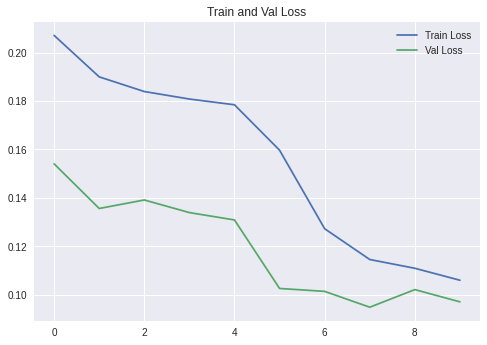

In [671]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Reshape, Dense, Embedding, Dropout, LSTM, MaxPooling1D, Lambda, Concatenate, \
    Multiply, RepeatVector, Flatten, Activation, Permute, Conv1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import keras.backend as K

epoch = 50
batch_size = 128
best_model_file = 'best_model.h5'

def bp_model():
    #建立模型
    inputs=Input(shape=x_train.shape[-2:])
    flat = Flatten()(inputs)
    dense = Dense(64, activation='relu')(flat)
    outputs = Dense(predict_dim, activation='relu')(dense)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile('adam','mae')
    model.summary()
    return model  

myModel = bp_model()
#save best model
es = EarlyStopping(monitor='val_loss', patience=2)
cp = ModelCheckpoint(filepath=best_model_file, monitor='val_loss', save_best_only=True)
history = myModel.fit(x=x_train,
                    y=y_train,
                    batch_size=batch_size,
                    epochs=epoch,
                    verbose=2,callbacks=[es, cp],
                    validation_split=0.1)
#iter plot
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(loss))
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend(loc='upper right')
plt.title('Train and Val Loss')
plt.show()


In [672]:
myModel.load_weights(best_model_file)
y_test_predict = myModel.predict(x_test)
polution_1_pred = y_test_predict.copy()
polution_1_test = y_test.copy()
polution_1_pred, polution_1_test

(array([[0.2319633 , 0.20085827, 0.        ]], dtype=float32),
 array([[0.26315789, 0.26315789, 0.26315789]]))

In [673]:
polution_1_last = myModel.predict(x_last)
polution_1_last

array([[0.17367455, 0.21253134, 0.10798196]], dtype=float32)

# polution-2

In [674]:
target_id = 1

x = []
y = []
for i, _ in enumerate(data):
    if len(data[i+time_step: i+time_step+predict_dim])!= predict_dim:
        break
    x.append(data[i: i+time_step,:])
    y.append(data[i+time_step: i+time_step+predict_dim,target_id])
x = np.array(x)
y = np.array(y)
print('x.shape, y.shape', x.shape, y.shape)
x_train,x_test,y_train,y_test= x[:-1, :],x[-1: , :],y[:-1, :],y[-1: ,:]
print('x_train.shape,x_test.shape,y_train.shape,y_test.shape', x_train.shape,x_test.shape,y_train.shape,y_test.shape)

x.shape, y.shape (807, 10, 24) (807, 3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape (806, 10, 24) (1, 10, 24) (806, 3) (1, 3)


Model: "model_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_53 (InputLayer)        [(None, 10, 24)]          0         
_________________________________________________________________
flatten_52 (Flatten)         (None, 240)               0         
_________________________________________________________________
dense_104 (Dense)            (None, 64)                15424     
_________________________________________________________________
dense_105 (Dense)            (None, 3)                 195       
Total params: 15,619
Trainable params: 15,619
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
6/6 - 2s - loss: 0.2109 - val_loss: 0.1165
Epoch 2/50
6/6 - 0s - loss: 0.1731 - val_loss: 0.0949
Epoch 3/50
6/6 - 0s - loss: 0.1613 - val_loss: 0.0948
Epoch 4/50
6/6 - 0s - loss: 0.1532 - val_loss: 0.0950
Epoch 5/50
6/6 - 0s - loss: 0.1479 -

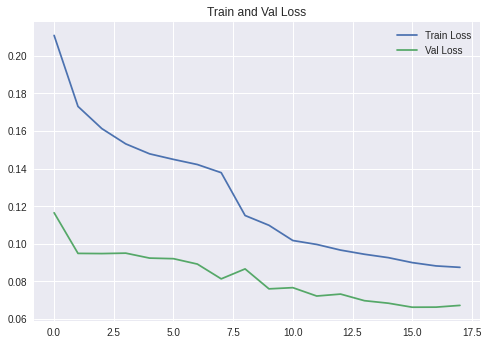

In [675]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Reshape, Dense, Embedding, Dropout, LSTM, MaxPooling1D, Lambda, Concatenate, \
    Multiply, RepeatVector, Flatten, Activation, Permute, Conv1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import keras.backend as K

epoch = 50
batch_size = 128
best_model_file = 'best_model.h5'

def bp_model():
    #建立模型
    inputs=Input(shape=x_train.shape[-2:])
    flat = Flatten()(inputs)
    dense = Dense(64, activation='relu')(flat)
    outputs = Dense(predict_dim, activation='relu')(dense)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile('adam','mae')
    model.summary()
    return model  

myModel = bp_model()
#save best model
es = EarlyStopping(monitor='val_loss', patience=2)
cp = ModelCheckpoint(filepath=best_model_file, monitor='val_loss', save_best_only=True)
history = myModel.fit(x=x_train,
                    y=y_train,
                    batch_size=batch_size,
                    epochs=epoch,
                    verbose=2,callbacks=[es, cp],
                    validation_split=0.1)
#iter plot
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(loss))
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend(loc='upper right')
plt.title('Train and Val Loss')
plt.show()


In [676]:
myModel.load_weights(best_model_file)
y_test_predict = myModel.predict(x_test)
polution_2_pred = y_test_predict.copy()
polution_2_test = y_test.copy()
polution_2_pred, polution_2_test

(array([[0.08417059, 0.08555277, 0.10154206]], dtype=float32),
 array([[0.0703125, 0.0546875, 0.0546875]]))

In [677]:
polution_2_last = myModel.predict(x_last)
polution_2_last

array([[0.06523069, 0.09931622, 0.0951156 ]], dtype=float32)

# polution-3

x.shape, y.shape (807, 10, 24) (807, 3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape (806, 10, 24) (1, 10, 24) (806, 3) (1, 3)
Model: "model_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_54 (InputLayer)        [(None, 10, 24)]          0         
_________________________________________________________________
flatten_53 (Flatten)         (None, 240)               0         
_________________________________________________________________
dense_106 (Dense)            (None, 64)                15424     
_________________________________________________________________
dense_107 (Dense)            (None, 3)                 195       
Total params: 15,619
Trainable params: 15,619
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
6/6 - 0s - loss: 0.1741 - val_loss: 0.1260
Epoch 2/50
6/6 - 0s - loss: 0.1400 - val_loss: 0.0786
Epoch 3/

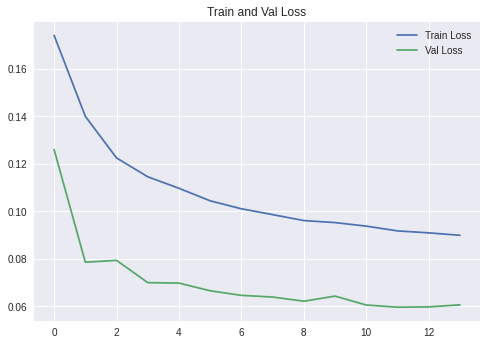

(array([[0.14029881, 0.11567053, 0.13391219]], dtype=float32),
 array([[0.10869565, 0.10869565, 0.08695652]]))

In [678]:
target_id = 2

x = []
y = []
for i, _ in enumerate(data):
    if len(data[i+time_step: i+time_step+predict_dim])!= predict_dim:
        break
    x.append(data[i: i+time_step,:])
    y.append(data[i+time_step: i+time_step+predict_dim,target_id])
x = np.array(x)
y = np.array(y)
print('x.shape, y.shape', x.shape, y.shape)
x_train,x_test,y_train,y_test= x[:-1, :],x[-1: , :],y[:-1, :],y[-1: ,:]
print('x_train.shape,x_test.shape,y_train.shape,y_test.shape', x_train.shape,x_test.shape,y_train.shape,y_test.shape)

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Reshape, Dense, Embedding, Dropout, LSTM, MaxPooling1D, Lambda, Concatenate, \
    Multiply, RepeatVector, Flatten, Activation, Permute, Conv1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import keras.backend as K

epoch = 50
batch_size = 128
best_model_file = 'best_model.h5'

def bp_model():
    #建立模型
    inputs=Input(shape=x_train.shape[-2:])
    flat = Flatten()(inputs)
    dense = Dense(64, activation='relu')(flat)
    outputs = Dense(predict_dim, activation='relu')(dense)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile('adam','mae')
    model.summary()
    return model  

myModel = bp_model()
#save best model
es = EarlyStopping(monitor='val_loss', patience=2)
cp = ModelCheckpoint(filepath=best_model_file, monitor='val_loss', save_best_only=True)
history = myModel.fit(x=x_train,
                    y=y_train,
                    batch_size=batch_size,
                    epochs=epoch,
                    verbose=2,callbacks=[es, cp],
                    validation_split=0.1)
#iter plot
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(loss))
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend(loc='upper right')
plt.title('Train and Val Loss')
plt.show()


myModel.load_weights(best_model_file)
y_test_predict = myModel.predict(x_test)
polution_3_pred = y_test_predict.copy()
polution_3_test = y_test.copy()
polution_3_pred, polution_3_test

In [679]:
polution_3_last = myModel.predict(x_last)
polution_3_last

array([[0.10975611, 0.14908828, 0.19060083]], dtype=float32)

# polution-4

x.shape, y.shape (807, 10, 24) (807, 3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape (806, 10, 24) (1, 10, 24) (806, 3) (1, 3)
Model: "model_54"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_55 (InputLayer)        [(None, 10, 24)]          0         
_________________________________________________________________
flatten_54 (Flatten)         (None, 240)               0         
_________________________________________________________________
dense_108 (Dense)            (None, 64)                15424     
_________________________________________________________________
dense_109 (Dense)            (None, 3)                 195       
Total params: 15,619
Trainable params: 15,619
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
6/6 - 2s - loss: 0.0597 - val_loss: 0.0235
Epoch 2/50
6/6 - 0s - loss: 0.0488 - val_loss: 0.0232
Epoch 3/

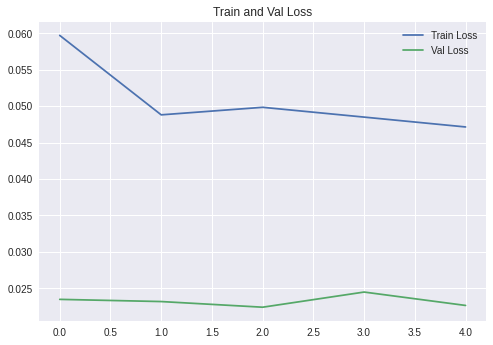

(array([[0., 0., 0.]], dtype=float32),
 array([[0.00647948, 0.00215983, 0.00647948]]))

In [680]:
target_id = 3

x = []
y = []
for i, _ in enumerate(data):
    if len(data[i+time_step: i+time_step+predict_dim])!= predict_dim:
        break
    x.append(data[i: i+time_step,:])
    y.append(data[i+time_step: i+time_step+predict_dim,target_id])
x = np.array(x)
y = np.array(y)
print('x.shape, y.shape', x.shape, y.shape)
x_train,x_test,y_train,y_test= x[:-1, :],x[-1: , :],y[:-1, :],y[-1: ,:]
print('x_train.shape,x_test.shape,y_train.shape,y_test.shape', x_train.shape,x_test.shape,y_train.shape,y_test.shape)

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Reshape, Dense, Embedding, Dropout, LSTM, MaxPooling1D, Lambda, Concatenate, \
    Multiply, RepeatVector, Flatten, Activation, Permute, Conv1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import keras.backend as K

epoch = 50
batch_size = 128
best_model_file = 'best_model.h5'

def bp_model():
    #建立模型
    inputs=Input(shape=x_train.shape[-2:])
    flat = Flatten()(inputs)
    dense = Dense(64, activation='relu')(flat)
    outputs = Dense(predict_dim, activation='relu')(dense)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile('adam','mae')
    model.summary()
    return model  

myModel = bp_model()
#save best model
es = EarlyStopping(monitor='val_loss', patience=2)
cp = ModelCheckpoint(filepath=best_model_file, monitor='val_loss', save_best_only=True)
history = myModel.fit(x=x_train,
                    y=y_train,
                    batch_size=batch_size,
                    epochs=epoch,
                    verbose=2,callbacks=[es, cp],
                    validation_split=0.1)
#iter plot
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(loss))
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend(loc='upper right')
plt.title('Train and Val Loss')
plt.show()


myModel.load_weights(best_model_file)
y_test_predict = myModel.predict(x_test)
polution_4_pred = y_test_predict.copy()
polution_4_test = y_test.copy()
polution_4_pred, polution_4_test

In [681]:
polution_4_last = myModel.predict(x_last)
polution_4_last

array([[0., 0., 0.]], dtype=float32)

# polution-5

x.shape, y.shape (807, 10, 24) (807, 3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape (806, 10, 24) (1, 10, 24) (806, 3) (1, 3)
Model: "model_55"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_56 (InputLayer)        [(None, 10, 24)]          0         
_________________________________________________________________
flatten_55 (Flatten)         (None, 240)               0         
_________________________________________________________________
dense_110 (Dense)            (None, 64)                15424     
_________________________________________________________________
dense_111 (Dense)            (None, 3)                 195       
Total params: 15,619
Trainable params: 15,619
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
6/6 - 0s - loss: 0.2327 - val_loss: 0.1810
Epoch 2/50
6/6 - 0s - loss: 0.2093 - val_loss: 0.1750
Epoch 3/

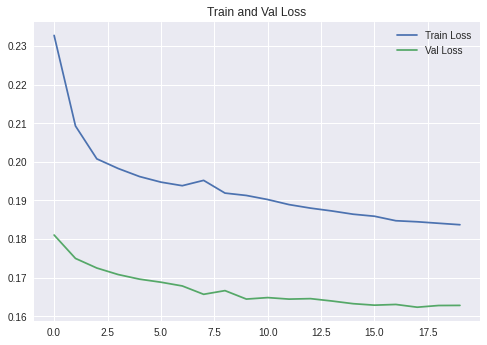

(array([[0.30368033, 0.        , 0.28089765]], dtype=float32),
 array([[0.26870748, 0.20748299, 0.26870748]]))

In [682]:
target_id = 4

x = []
y = []
for i, _ in enumerate(data):
    if len(data[i+time_step: i+time_step+predict_dim])!= predict_dim:
        break
    x.append(data[i: i+time_step,:])
    y.append(data[i+time_step: i+time_step+predict_dim,target_id])
x = np.array(x)
y = np.array(y)
print('x.shape, y.shape', x.shape, y.shape)
x_train,x_test,y_train,y_test= x[:-1, :],x[-1: , :],y[:-1, :],y[-1: ,:]
print('x_train.shape,x_test.shape,y_train.shape,y_test.shape', x_train.shape,x_test.shape,y_train.shape,y_test.shape)

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Reshape, Dense, Embedding, Dropout, LSTM, MaxPooling1D, Lambda, Concatenate, \
    Multiply, RepeatVector, Flatten, Activation, Permute, Conv1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import keras.backend as K

epoch = 50
batch_size = 128
best_model_file = 'best_model.h5'

def bp_model():
    #建立模型
    inputs=Input(shape=x_train.shape[-2:])
    flat = Flatten()(inputs)
    dense = Dense(64, activation='relu')(flat)
    outputs = Dense(predict_dim, activation='relu')(dense)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile('adam','mae')
    model.summary()
    return model  

myModel = bp_model()
#save best model
es = EarlyStopping(monitor='val_loss', patience=2)
cp = ModelCheckpoint(filepath=best_model_file, monitor='val_loss', save_best_only=True)
history = myModel.fit(x=x_train,
                    y=y_train,
                    batch_size=batch_size,
                    epochs=epoch,
                    verbose=2,callbacks=[es, cp],
                    validation_split=0.1)
#iter plot
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(loss))
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend(loc='upper right')
plt.title('Train and Val Loss')
plt.show()


myModel.load_weights(best_model_file)
y_test_predict = myModel.predict(x_test)
polution_5_pred = y_test_predict.copy()
polution_5_test = y_test.copy()
polution_5_pred, polution_5_test

In [683]:
polution_5_last = myModel.predict(x_last)
polution_5_last

array([[0.23350087, 0.        , 0.24870366]], dtype=float32)

# polution-6

x.shape, y.shape (807, 10, 24) (807, 3)
x_train.shape,x_test.shape,y_train.shape,y_test.shape (806, 10, 24) (1, 10, 24) (806, 3) (1, 3)
Model: "model_56"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_57 (InputLayer)        [(None, 10, 24)]          0         
_________________________________________________________________
flatten_56 (Flatten)         (None, 240)               0         
_________________________________________________________________
dense_112 (Dense)            (None, 64)                15424     
_________________________________________________________________
dense_113 (Dense)            (None, 3)                 195       
Total params: 15,619
Trainable params: 15,619
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
6/6 - 2s - loss: 0.1816 - val_loss: 0.1326
Epoch 2/50
6/6 - 0s - loss: 0.1396 - val_loss: 0.1157
Epoch 3/

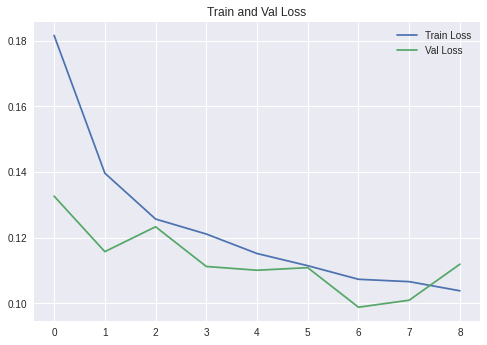

(array([[0.01078269, 0.17143506, 0.14006235]], dtype=float32),
 array([[0.08333333, 0.        , 0.08333333]]))

In [684]:
target_id = 5

x = []
y = []
for i, _ in enumerate(data):
    if len(data[i+time_step: i+time_step+predict_dim])!= predict_dim:
        break
    x.append(data[i: i+time_step,:])
    y.append(data[i+time_step: i+time_step+predict_dim,target_id])
x = np.array(x)
y = np.array(y)
print('x.shape, y.shape', x.shape, y.shape)
x_train,x_test,y_train,y_test= x[:-1, :],x[-1: , :],y[:-1, :],y[-1: ,:]
print('x_train.shape,x_test.shape,y_train.shape,y_test.shape', x_train.shape,x_test.shape,y_train.shape,y_test.shape)

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Reshape, Dense, Embedding, Dropout, LSTM, MaxPooling1D, Lambda, Concatenate, \
    Multiply, RepeatVector, Flatten, Activation, Permute, Conv1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import keras.backend as K

epoch = 50
batch_size = 128
best_model_file = 'best_model.h5'

def bp_model():
    #建立模型
    inputs=Input(shape=x_train.shape[-2:])
    flat = Flatten()(inputs)
    dense = Dense(64, activation='relu')(flat)
    outputs = Dense(predict_dim, activation='relu')(dense)
    model = Model(inputs=inputs, outputs=outputs)
    model.compile('adam','mae')
    model.summary()
    return model  

myModel = bp_model()
#save best model
es = EarlyStopping(monitor='val_loss', patience=2)
cp = ModelCheckpoint(filepath=best_model_file, monitor='val_loss', save_best_only=True)
history = myModel.fit(x=x_train,
                    y=y_train,
                    batch_size=batch_size,
                    epochs=epoch,
                    verbose=2,callbacks=[es, cp],
                    validation_split=0.1)
#iter plot
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(loss))
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Val Loss')
plt.legend(loc='upper right')
plt.title('Train and Val Loss')
plt.show()


myModel.load_weights(best_model_file)
y_test_predict = myModel.predict(x_test)
polution_6_pred = y_test_predict.copy()
polution_6_test = y_test.copy()
polution_6_pred, polution_6_test

In [685]:
polution_6_last = myModel.predict(x_last)
polution_6_last

array([[0.0691437 , 0.2018865 , 0.14909266]], dtype=float32)

# 结合+返归一化

In [686]:
all_test = np.array([polution_1_test,polution_2_test,polution_3_test,
                     polution_4_test,polution_5_test,polution_6_test ])
all_test = all_test[:,0,:].T
all_test = mm_x.inverse_transform(all_test)
all_test

array([[ 6. , 13. , 20. ,  5. , 81. ,  0.4],
       [ 6. , 11. , 20. ,  3. , 63. ,  0.3],
       [ 6. , 11. , 17. ,  5. , 81. ,  0.4]])

In [687]:
all_pred = np.array([polution_1_pred,polution_2_pred,polution_3_pred,
                     polution_4_pred,polution_5_pred,polution_6_pred ])
all_pred = all_pred[:,0,:].T
all_pred = mm_x.inverse_transform(all_pred)
all_pred

array([[ 5.407303  , 14.773835  , 24.361237  ,  2.        , 91.28201   ,
         0.31293923],
       [ 4.816307  , 14.950754  , 20.962534  ,  2.        ,  2.        ,
         0.50572205],
       [ 1.        , 16.997383  , 23.479883  ,  2.        , 84.58391   ,
         0.4680748 ]], dtype=float32)

# 计算AQI和首要污染物---测试集上

In [688]:
import math

def compute_AQI(a):
    #a=np.array([n_SO2,n_NO2,n_PM10,n_PM25,n_O3,n_CO])
    T=np.array([[0,50,150,475,800,1600,2100,2620],[0,40,80,180,280,565,750,940],[0,50,150,250,350,420,500,600],[0,35,75,115,150,250,350,500],[0,100,160,215,265,800,0,0],[0,2,4,14,24,36,48,60]])
    I=np.array([0,50,100,150,200,300,400,500])
    BP_LO = []
    BP_Hi=[]
    IAQI_LO=[]
    IAQI_Hi=[]
    IAQI=np.zeros((1,6))
    result=[]
    for j in range(6):
        for i in range(1,9):
            if a[j] <= T[j, i]:
                BP_LO.append(T[j, i-1])
                BP_Hi.append(T[j, i])
                IAQI_LO.append(I[i-1])
                IAQI_Hi.append(I[i])
                break
            else:
                continue
        IAQI[0, j] = (IAQI_Hi[j] - IAQI_LO[j]) / (BP_Hi[j] - BP_LO[j]) * (a[j] - BP_LO[j]) + IAQI_LO[j]
        result.append(math.ceil(IAQI[0, j]))
    AQI=np.max(result)
    c=np.argmax(result)
    name=["SO2", "NO2", "PM10", "PM25", "O3", "CO"]
    if AQI<=50:
        polu_name = None
#         print("AQI为%d" %(AQI))
#         print("当天无首要污染物")
    else:
        polu_name = name[c]        
#         print("AQI为%d" % (AQI))
#         print('首要污染物为%s' % (name[c]))
    return [AQI, polu_name]
    

In [689]:
AQI_pred = [compute_AQI(inst) for inst in all_pred]
AQI_pred

[[46, None], [21, None], [43, None]]

In [690]:
AQI_test = [compute_AQI(inst) for inst in all_test]
AQI_test

[[41, None], [32, None], [41, None]]

# 真实预测

In [691]:
all_last = np.array([polution_1_last,polution_2_last,polution_3_last,
                     polution_4_last,polution_5_last,polution_6_last ])
all_last = all_last[:,0,:].T
all_last = mm_x.inverse_transform(all_last)
all_last

array([[ 4.2998166 , 12.349528  , 20.146345  ,  2.        , 70.649254  ,
         0.38297245],
       [ 5.0380955 , 16.712475  , 25.574183  ,  2.        ,  2.        ,
         0.5422638 ],
       [ 3.0516572 , 16.174797  , 31.302916  ,  2.        , 75.11887   ,
         0.47891122]], dtype=float32)

In [692]:
AQI_pred = [compute_AQI(inst) for inst in all_last]
AQI_pred

[[36, None], [26, None], [38, None]]